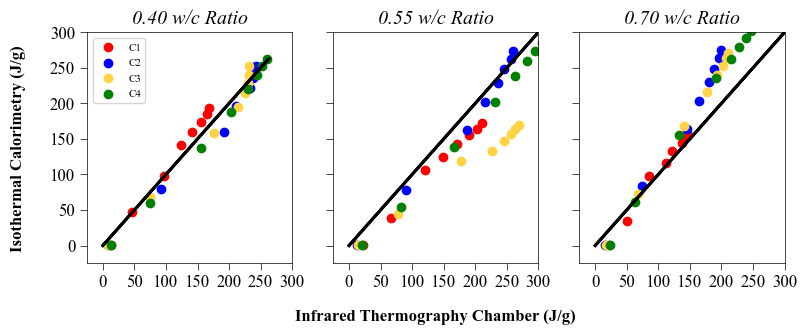

In [109]:
# Datasent Inforamtion
# What is the "name" of the dataset? Cement Paste Data
# Where did you obtain it? I collected the samples
# Where can we obtain it? (i.e., URL): Will be available after first publication.
# What is the license of the dataset? What are we allowed to do with it? None and do not share.
# How big is it in file size and in items? 21,823 KB, 231201_Infrared and Isothermal Data_Paste_Diggs_V14.xlsx, Completed Code for Array of Data with Color Scatter Plot (1).ipynb

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from matplotlib.ticker import MultipleLocator
def customize_ticks(ax, x_major, x_minor, y_major, y_minor):
    """
    Customize the ticks on the x and y axes
    
    Parameters:
    ax (object): The axes object to customize
    x_major (int): The frequency for major ticks on the x-axis
    x_minor (int): The frequency for minor ticks on the x-axis
    y_major (int): The frequency for major ticks on the y-axis
    y_minor (int): The frequency for minor ticks on the y-axis
    
    Returns:
    ax (object): The customized axes object
    """
    
    # Set the frequency of major ticks on the x-axis
    ax.xaxis.set_major_locator(MultipleLocator(x_major))
    # Set the frequency of minor ticks on the x-axis
    ax.xaxis.set_minor_locator(MultipleLocator(x_minor))

    # Set the frequency of major ticks on the y-axis
    ax.yaxis.set_major_locator(MultipleLocator(y_major))
    # Set the frequency of minor ticks on the y-axis
    ax.yaxis.set_minor_locator(MultipleLocator(y_minor))

    # Set tick parameters: length, width, and size of labels for major ticks (labelsize also affects minor ticks)
    ax.tick_params(axis='both', which='major', length=5, width=0.5, labelsize=12)
    # Set tick parameters: length and width for minor ticks
    ax.tick_params(axis='both', which='minor', length=2.5, width=0.5)

    return ax
# Define the font properties for the plot
font = {'family' : 'Times New Roman',
        'weight' : 'regular',
        'size'   : 12}
# Apply the font properties
plt.rc('font', **font)

# Define the font size for the labels
lfs = 12

# Load data from an Excel sheet
df = pd.read_excel(r'C:\Users\brandyd2\Downloads\231201_Infrared and Isothermal Data_Paste_Diggs_V14.xlsx', sheet_name='Cumulative Comparison')

# Set the aspect ratio (width:height)
aspect_ratio = (3, 3)

# Number of plots
n_plots = 3

# Create a new figure with multiple subplots
fig, axes = plt.subplots(1, n_plots, figsize=(aspect_ratio[0] * n_plots, aspect_ratio[1]))

# Define titles for each plot
plot_titles = ['0.40 w/c Ratio', '0.55 w/c Ratio', '0.70 w/c Ratio']

# Define column names for different w/c ratios
columns_for_plots = [
    ('Infrared Thermography Chamber-0.40', 'Isothermal Calorimetry-0.40', 'xSlope-0.40', 'ySlope-0.40'),
    ('Infrared Thermography Chamber-0.55', 'Isothermal Calorimetry-0.55', 'xSlope-0.55', 'ySlope-0.55'),
    ('Infrared Thermography Chamber-0.70', 'Isothermal Calorimetry-0.70', 'xSlope-0.70', 'ySlope-0.70')]

# Define colors for each sample category
colors = {'C1': 'red', 'C2': 'blue', 'C3': '#ffd343', 'C4': 'green'}

for i, (x_col, y_col, xslope, yslope) in enumerate(columns_for_plots):
    ax = axes[i]
    ax.set_title(plot_titles[i], fontstyle='italic')
  
    
    # Loop through each category (C1, C2, C3, C4) and plot
    for category, color in colors.items():
        # Filter the DataFrame for the current category in 'Sample-0.40' column
        subset = df[df['Sample-0.40'] == category]

        # Plot the subset using the specific columns for that category
        ax.scatter(subset[x_col], subset[y_col], color=color, label=category if i == 0 else "")

    # Line plot (if applicable)
        ax.plot(df[xslope], df[yslope], color='black', linewidth=2)
   

    # Customize axis labels and title
    if i == 0:
        # Set labels and title for the first subplot
        ax.set_xlabel('Infrared Thermography Chamber (J/g)', fontsize=lfs, weight='bold', color='k')
        ax.set_ylabel('Isothermal Calorimetry (J/g)', fontsize=lfs, weight='bold', color='k')
    
    else:
        # Remove axis labels and y-tick labels for the 2nd and 3rd subplots
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_yticklabels([])  # This will remove y-axis labels
 # Center the x and y-axis labels
    ax.xaxis.set_label_coords(1.7, -0.2)  # Adjust the second argument as needed for x-axis
    ax.yaxis.set_label_coords(-0.3, 0.5)  # Adjust the first argument as needed for y-axis

    # Set the limits for the x-axis and y-axis
    ax.set_xlim(-25, 300)
    ax.set_ylim(-25, 300)


    # Customize ticks
    ax = customize_ticks(ax, x_major=50, x_minor=50, y_major=50, y_minor=50)

    # Set the thickness of the border
    border_thickness = 0.5
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(border_thickness)

# Add legend to the first subplot
    if i == 0:
          # Create the label for the line including the slope
               ax.legend(loc='upper left', fontsize='8')  # You can change 'small' to a specific size like 10, 12, etc.

# Display the plot
plt.show()

# Save the plot in the current directory
filename = os.path.join(os.getcwd(), "Figure 1_Cumulative Heat Comparison.png")
filename = os.path.join(r'C:\Users\brandyd2\Downloads',"Figure 1_Cumulative Heat Comparison.png")
fig.savefig(filename, dpi=300, bbox_inches='tight')
